# Mini project 1
- 데이터에서 각 구분에 따른 '운동을 하지 않는 이유'를 확인하고 시각화하기
    - 성별
    - 연령별
    - 학력별

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# import plotly.io as pio
# pio.renderers.default = "svg"

plt.rcParams['font.family'] ='Malgun Gothic' # 한글 표시
plt.rcParams['axes.unicode_minus'] =False

In [2]:
# data 확인
df = pd.read_csv("./data/notExercise.CSV", encoding='cp949') # 한글 깨짐 방지
df.head()

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,2017,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8
3,2017,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,2017,연령별,20대,54.8,6.9,5.2,32.9,0.1


In [3]:
# 1. (성별) 운동을 하지 않는 이유와 비율 
data1 = df[df['대분류']=='성별']
data1 = data1.drop(labels=['대분류', '기간', '기타'], axis=1)
data1

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서
1,남자,55.2,7.9,5.5,29.8
2,여자,45.0,8.3,6.0,38.8


In [4]:
# 2. (연령별) 운동을 하지 않는 이유와 비율 
data2 = df[df['대분류']=='연령별']
data2 = data2.drop(labels=['대분류', '기간', '기타', '운동을 싫어해서'], axis=1)
data2

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서
3,10대,55.7,6.1,5.6
4,20대,54.8,6.9,5.2
5,30대,58.1,5.5,4.6
6,40대,57.7,6.8,5.2
7,50대,50.1,9.2,7.2
8,60대 이상,27.5,12.8,6.9


In [5]:
# 3. (학력별) 운동을 하지 않는 이유와 비율 
data3 = df[df['대분류']=='학력별']
data3 = data3.drop(labels=['대분류', '기간', '기타', '함께 운동을 할 사람이 없어서', '운동을 할 만한 장소가 없어서'], axis=1)
data3

,분류,운동을 할 충분한 시간이 없어서,운동을 싫어해서
9,중졸 이하,26.1,46.2
10,고졸 이하,46.3,36.5
11,대졸 이하,57.4,30.7
12,대학원 이상,65.3,29.6


In [6]:
# 1. (성별) 운동을 하지 않는 이유와 비율 - 시각화

# 2x2 서브플롯 생성, 원 그래프를 위한 서브플롯 유형 지정
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("운동을 할 충분한 시간이 없어서", "함께 운동을 할 사람이 없어서",
                    "운동을 할 만한 장소가 없어서", "운동을 싫어해서"),
    specs=[[{"type": "pie"}, {"type": "pie"}], [{"type": "pie"}, {"type": "pie"}]]
)

# 첫 번째 서브플롯: 운동을 할 충분한 시간이 없어서
fig.add_trace(go.Pie(labels=data1['분류'], values=data1['운동을 할 충분한 시간이 없어서']), row=1, col=1)

# 두 번째 서브플롯: 함께 운동을 할 사람이 없어서
fig.add_trace(go.Pie(labels=data1['분류'], values=data1['함께 운동을 할 사람이 없어서']), row=1, col=2)

# 세 번째 서브플롯: 운동을 할 만한 장소가 없어서
fig.add_trace(go.Pie(labels=data1['분류'], values=data1['운동을 할 만한 장소가 없어서']), row=2, col=1)

# 네 번째 서브플롯: 운동을 싫어해서
fig.add_trace(go.Pie(labels=data1['분류'], values=data1['운동을 싫어해서']), row=2, col=2)

# 이미지 크기 설정
fig.update_layout(width=800, height=800)
fig.update_annotations(font=dict(size=15)) # 폰트 사이즈 설정
fig.update_layout(title_text=('(성별) 운동을 하지 않는 이유와 그 비율')) # 타이틀 설정|

fig.show()

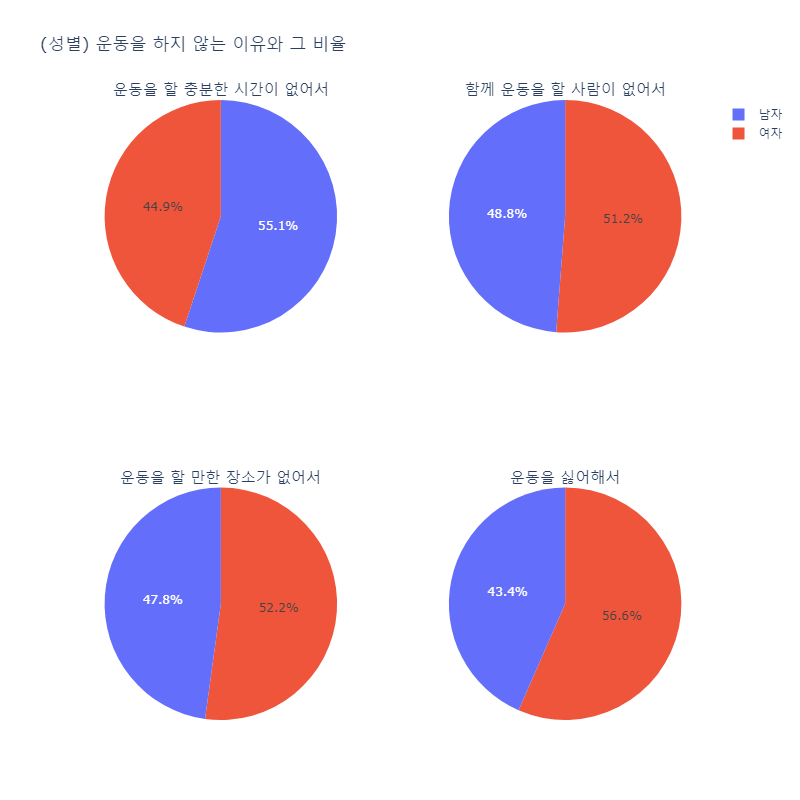

In [7]:
# 2. (연령별) 운동을 하지 않는 이유와 비율 - 시각화

# 3x1 서브플롯 생성, 원 그래프를 위한 서브플롯 유형 지정
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("운동을 할 충분한 시간이 없어서", "함께 운동을 할 사람이 없어서","운동을 할 만한 장소가 없어서"),
    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]]
)

# 첫 번째 서브플롯: 운동을 할 충분한 시간이 없어서
fig.add_trace(go.Pie(labels=data2['분류'], values=data2['운동을 할 충분한 시간이 없어서']), row=1, col=1)

# 두 번째 서브플롯: 함께 운동을 할 사람이 없어서
fig.add_trace(go.Pie(labels=data2['분류'], values=data2['함께 운동을 할 사람이 없어서']), row=1, col=2)

# 세 번째 서브플롯: 운동을 할 만한 장소가 없어서
fig.add_trace(go.Pie(labels=data2['분류'], values=data2['운동을 할 만한 장소가 없어서']), row=1, col=3)

# 이미지 크기 설정
fig.update_layout(width=900, height=400)
fig.update_annotations(font=dict(size=15)) # 폰트 사이즈 설정
fig.update_layout(title_text="(연령별) 운동을 하지 않는 이유와 그 비율") # 타이틀 설정

fig.show()

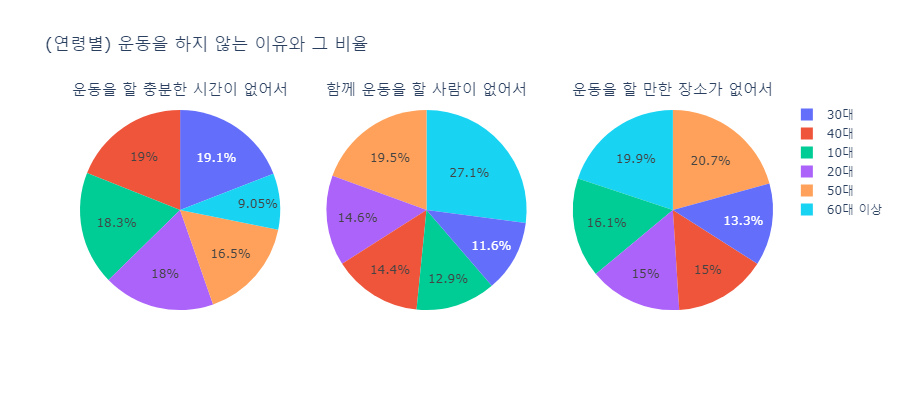

In [8]:
# 3. (학력별) 운동을 하지 않는 이유와 비율 - 시각화

# 2x1 서브플롯 생성, 원 그래프를 위한 서브플롯 유형 지정
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("운동을 할 충분한 시간이 없어서", "운동을 싫어해서"),
    specs=[[{"type": "pie"}, {"type": "pie"}]]
)

# 첫 번째 서브플롯: 운동을 할 충분한 시간이 없어서
fig.add_trace(go.Pie(labels=data3['분류'], values=data3['운동을 할 충분한 시간이 없어서']), row=1, col=1)

# 두 번째 서브플롯: 운동을 싫어해서
fig.add_trace(go.Pie(labels=data3['분류'], values=data3['운동을 싫어해서']), row=1, col=2)

# 이미지 크기 설정
fig.update_layout(width=800, height=400)
fig.update_annotations(font=dict(size=15)) # 폰트 사이즈 설정
fig.update_layout(title_text="(학력별) 운동을 하지 않는 이유와 그 비율") # 타이틀 설정

fig.show()

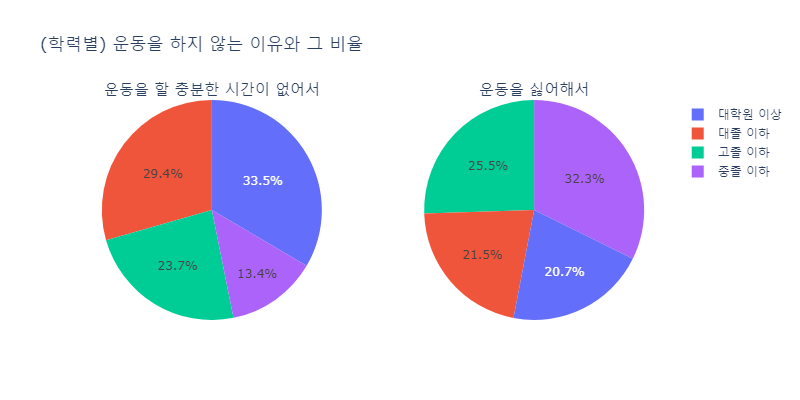